<a href="https://colab.research.google.com/github/Himangi-77/Python_codes/blob/main/Hypothesis_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This report aims at understanding and applying Hypothesis testing methods such as

Normal Distribution
Student t Distribution
ANOVA
Some Machine learning tecniques such as

Linear Regressor
are also used to do predictive analysis

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import scipy.stats as stats
import math
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
data = pd.read_csv('/content/data.csv')
data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,24,28) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Row ID,Year,Department Title,Payroll Department,Record Number,Job Class Title,Employment Type,Hourly or Event Rate,Projected Annual Salary,Q1 Payments,...,MOU Title,FMS Department,Job Class,Pay Grade,Average Health Cost,Average Dental Cost,Average Basic Life,Average Benefit Cost,Benefits Plan,Job Class Link
0,111391,2014,Water And Power (DWP),NaN,1412316577,Commercial Service Representative,Full Time,NaN,$70386.48,$16129.89,...,NaN,98,1230,NaN,$16842.08,$1282.61,$0.00,$18124.69,DWP,http://per.lacity.org/perspecs/1230.pdf
1,31732,2013,Police (LAPD),4301.0,432728338,Police Officer I,Full Time,$25.12,$52450.56,$11331.00,...,POLICE OFFICERS UNIT,70,2214,A,$11651.40,$898.08,$191.04,$12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
2,27697,2013,Police (LAPD),4301.0,97182506,Police Officer II,Full Time,$42.77,$89303.76,$20036.32,...,POLICE OFFICERS UNIT,70,2214,2,$11651.40,$898.08,$191.04,$12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
3,14136,2013,Harbor (Port of LA),3201.0,950136941,Senior Security Officer,Full Time,$28.75,$60028.96,$15793.88,...,SUPV BLUE COLLAR,42,3184,0,$10710.24,$405.24,$11.40,$11126.88,City,http://per.lacity.org/perspecs/3184.pdf
4,91896,2014,Public Works - Sanitation,7024.0,3230003445,Senior Clerk Typist,Full Time,$30.92,$64553.13,$14700.00,...,CLERICAL UNIT,82,1368,0,$11000.40,$409.68,$11.40,$11421.48,City,http://per.lacity.org/perspecs/1368.pdf


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285008 entries, 0 to 285007
Data columns (total 35 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Row ID                        285008 non-null  int64  
 1   Year                          285008 non-null  int64  
 2   Department Title              285008 non-null  object 
 3   Payroll Department            231463 non-null  float64
 4   Record Number                 285008 non-null  object 
 5   Job Class Title               285008 non-null  object 
 6   Employment Type               285008 non-null  object 
 7   Hourly or Event Rate          263987 non-null  object 
 8   Projected Annual Salary       285008 non-null  object 
 9   Q1 Payments                   285008 non-null  object 
 10  Q2 Payments                   285008 non-null  object 
 11  Q3 Payments                   285008 non-null  object 
 12  Q4 Payments                   285008 non-nul

In [4]:
data.isnull().sum()

Row ID                              0
Year                                0
Department Title                    0
Payroll Department              53545
Record Number                       0
Job Class Title                     0
Employment Type                     0
Hourly or Event Rate            21021
Projected Annual Salary             0
Q1 Payments                         0
Q2 Payments                         0
Q3 Payments                         0
Q4 Payments                         0
Payments Over Base Pay              0
% Over Base Pay                     0
Total Payments                      0
Base Pay                            0
Permanent Bonus Pay                 0
Longevity Bonus Pay                 0
Temporary Bonus Pay                 0
Lump Sum Pay                    42264
Overtime Pay                      434
Other Pay & Adjustments             0
Other Pay (Payroll Explorer)        0
MOU                             21021
MOU Title                       21021
FMS Departme

In [5]:
data = data.fillna(0)

In [6]:
data = data.drop(['Record Number'], axis=1)

In [7]:
pd.set_option('display.max_columns',None)

In [8]:
data.head()

,Row ID,Year,Department Title,Payroll Department,Job Class Title,Employment Type,Hourly or Event Rate,Projected Annual Salary,Q1 Payments,Q2 Payments,Q3 Payments,Q4 Payments,Payments Over Base Pay,% Over Base Pay,Total Payments,Base Pay,Permanent Bonus Pay,Longevity Bonus Pay,Temporary Bonus Pay,Lump Sum Pay,Overtime Pay,Other Pay & Adjustments,Other Pay (Payroll Explorer),MOU,MOU Title,FMS Department,Job Class,Pay Grade,Average Health Cost,Average Dental Cost,Average Basic Life,Average Benefit Cost,Benefits Plan,Job Class Link
0,111391,2014,Water And Power (DWP),0.0,Commercial Service Representative,Full Time,0,$70386.48,$16129.89,$17829.78,$17678.24,$22946.57,$14273.91,23.67%,$74584.48,$60310.57,$0.00,$0.00,$0.00,0,$369.12,$13904.79,$13904.79,0,0,98,1230,0,$16842.08,$1282.61,$0.00,$18124.69,DWP,http://per.lacity.org/perspecs/1230.pdf
1,31732,2013,Police (LAPD),4301.0,Police Officer I,Full Time,$25.12,$52450.56,$11331.00,$13859.93,$11968.32,$14048.20,$1700.40,3.43%,$51207.45,$49507.05,$1269.83,$0.00,$239.20,$0.00,$11.13,$180.24,$1689.27,24.0,POLICE OFFICERS UNIT,70,2214,A,$11651.40,$898.08,$191.04,$12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
2,27697,2013,Police (LAPD),4301.0,Police Officer II,Full Time,$42.77,$89303.76,$20036.32,$23479.20,$21153.60,$24360.49,$4120.20,4.85%,$89029.61,$84909.41,$1954.51,$0.00,$1519.00,$0.00,$482.29,$164.40,$3637.91,24.0,POLICE OFFICERS UNIT,70,2214,2,$11651.40,$898.08,$191.04,$12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
3,14136,2013,Harbor (Port of LA),3201.0,Senior Security Officer,Full Time,$28.75,$60028.96,$15793.88,$18560.38,$16471.18,$21110.80,$14275.44,24.76%,$71936.24,$57660.80,$0.00,$1585.72,$935.00,$0.00,$11504.72,$250.00,$2770.72,12.0,SUPV BLUE COLLAR,42,3184,0,$10710.24,$405.24,$11.40,$11126.88,City,http://per.lacity.org/perspecs/3184.pdf
4,91896,2014,Public Works - Sanitation,7024.0,Senior Clerk Typist,Full Time,$30.92,$64553.13,$14700.00,$17313.10,$15257.17,$17313.10,$5191.62,8.74%,$64583.37,$59391.75,$0.00,$4774.25,$0.00,$0.00,$417.37,$0.00,$4774.25,3.0,CLERICAL UNIT,82,1368,0,$11000.40,$409.68,$11.40,$11421.48,City,http://per.lacity.org/perspecs/1368.pdf


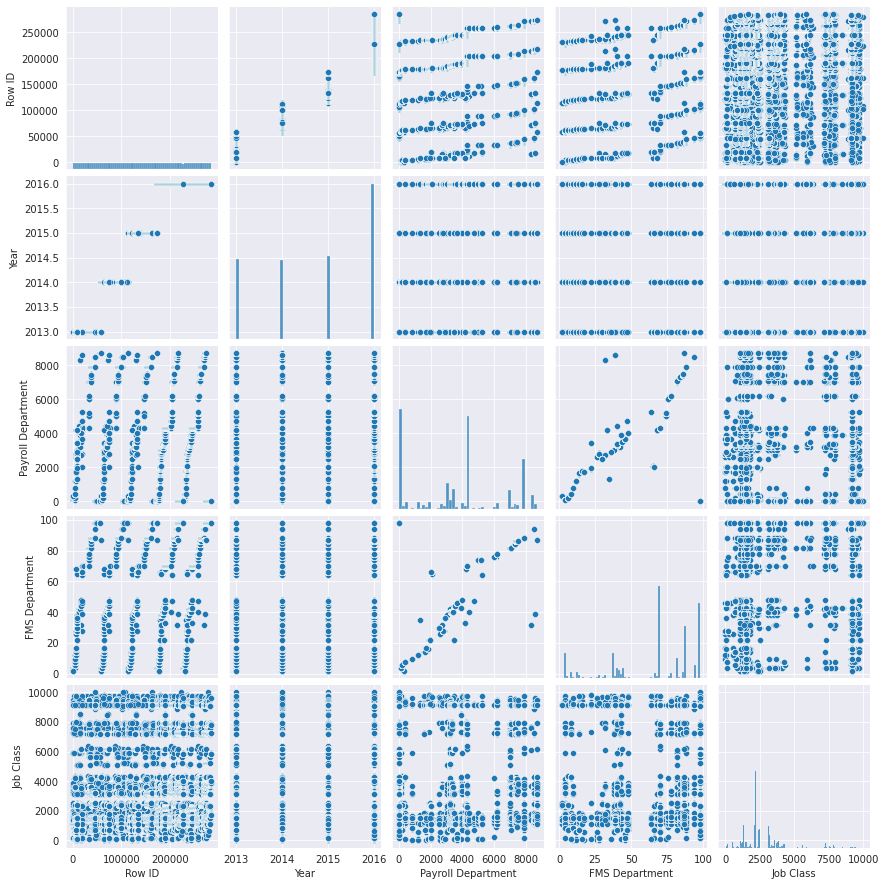

In [9]:
sns.set_style('darkgrid')
sns.pairplot(data)

In [10]:
data['Employment Type'].value_counts()

Full Time    236553
Part Time     47538
Per Event       917
Name: Employment Type, dtype: int64

In [11]:
data['MOU Title'].value_counts()

0                                  21021
POLICE OFFICERS UNIT               20372
CLERICAL UNIT                      14218
Clerical                           11964
POLICE OFFICERS, LTS. AND BELOW    10284
                                   ...  
MANAGEMENT ATTORNEYS                  13
PORT PILOTS                           13
MANAGEMENT PEACE OFFICER              13
Airport Police Command Officers       12
AIRPORT POLICE COMMAND OFFICERS        6
Name: MOU Title, Length: 151, dtype: int64

In [12]:
data['Benefits Plan'].value_counts()

City      125266
DWP        53030
Police     51069
0          39082
Fire       16561
Name: Benefits Plan, dtype: int64

In [13]:
for i in ['Projected Annual Salary','Q1 Payments','Q2 Payments','Q3 Payments','Q4 Payments','Payments Over Base Pay',
          'Total Payments','Base Pay','Permanent Bonus Pay','Longevity Bonus Pay','Temporary Bonus Pay','Overtime Pay',
          'Other Pay & Adjustments','Other Pay (Payroll Explorer)','Average Health Cost','Average Dental Cost',
          'Average Basic Life','Average Benefit Cost']:
    data[i] = data[i].str.replace('$','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """


In [14]:
data.head()

,Row ID,Year,Department Title,Payroll Department,Job Class Title,Employment Type,Hourly or Event Rate,Projected Annual Salary,Q1 Payments,Q2 Payments,Q3 Payments,Q4 Payments,Payments Over Base Pay,% Over Base Pay,Total Payments,Base Pay,Permanent Bonus Pay,Longevity Bonus Pay,Temporary Bonus Pay,Lump Sum Pay,Overtime Pay,Other Pay & Adjustments,Other Pay (Payroll Explorer),MOU,MOU Title,FMS Department,Job Class,Pay Grade,Average Health Cost,Average Dental Cost,Average Basic Life,Average Benefit Cost,Benefits Plan,Job Class Link
0,111391,2014,Water And Power (DWP),0.0,Commercial Service Representative,Full Time,0,70386.48,16129.89,17829.78,17678.24,22946.57,14273.91,23.67%,74584.48,60310.57,0.00,0.00,0.00,0,369.12,13904.79,13904.79,0,0,98,1230,0,16842.08,1282.61,0.00,18124.69,DWP,http://per.lacity.org/perspecs/1230.pdf
1,31732,2013,Police (LAPD),4301.0,Police Officer I,Full Time,$25.12,52450.56,11331.00,13859.93,11968.32,14048.20,1700.40,3.43%,51207.45,49507.05,1269.83,0.00,239.20,$0.00,11.13,180.24,1689.27,24.0,POLICE OFFICERS UNIT,70,2214,A,11651.40,898.08,191.04,12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
2,27697,2013,Police (LAPD),4301.0,Police Officer II,Full Time,$42.77,89303.76,20036.32,23479.20,21153.60,24360.49,4120.20,4.85%,89029.61,84909.41,1954.51,0.00,1519.00,$0.00,482.29,164.40,3637.91,24.0,POLICE OFFICERS UNIT,70,2214,2,11651.40,898.08,191.04,12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
3,14136,2013,Harbor (Port of LA),3201.0,Senior Security Officer,Full Time,$28.75,60028.96,15793.88,18560.38,16471.18,21110.80,14275.44,24.76%,71936.24,57660.80,0.00,1585.72,935.00,$0.00,11504.72,250.00,2770.72,12.0,SUPV BLUE COLLAR,42,3184,0,10710.24,405.24,11.40,11126.88,City,http://per.lacity.org/perspecs/3184.pdf
4,91896,2014,Public Works - Sanitation,7024.0,Senior Clerk Typist,Full Time,$30.92,64553.13,14700.00,17313.10,15257.17,17313.10,5191.62,8.74%,64583.37,59391.75,0.00,4774.25,0.00,$0.00,417.37,0.00,4774.25,3.0,CLERICAL UNIT,82,1368,0,11000.40,409.68,11.40,11421.48,City,http://per.lacity.org/perspecs/1368.pdf


In [15]:
data = data[data['Projected Annual Salary']!=0]

In [16]:
data = data[data['Base Pay']!=0]

In [68]:
data['Base Pay'] = pd.to_numeric(data['Base Pay'], downcast='float')
data['Projected Annual Salary'] = pd.to_numeric(data['Projected Annual Salary'], downcast='float')
data['Average Benefit Cost'] = pd.to_numeric(data['Average Benefit Cost'], downcast = 'float')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


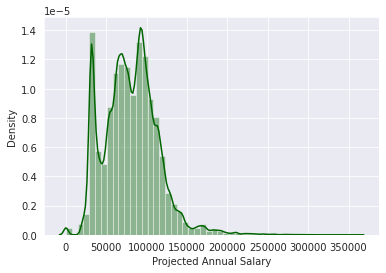

In [18]:
sns.distplot(data['Projected Annual Salary'], color='darkgreen')

In [19]:
data.Year.value_counts()

2016    110914
2015     59767
2013     57379
2014     56948
Name: Year, dtype: int64

In [20]:
pay_2013 = data[data.Year==2013]
pay_2014 = data[data.Year==2014]
pay_2015 = data[data.Year==2015]
pay_2016 = data[data.Year==2016]

LET'S CONDUCT A HYPOTHESIS TEST ON WHETHER THE SALARY INCREASES FROM 2015 TO 2016

In [21]:
mu1 = pay_2015['Projected Annual Salary'].mean()
mu2 = pay_2016['Projected Annual Salary'].mean()
std = statistics.stdev(pay_2015['Projected Annual Salary'])
pop_std_16 = statistics.stdev(pay_2016['Projected Annual Salary'])

Ho: There was no increase in the annual salary from 2015 to 2016
Ha: There was an increase
Confidence level = 95%

In [22]:
pay_2016_samp = pay_2016.sample(frac=0.10)
x = pay_2016_samp['Projected Annual Salary'].mean()
N = len(pay_2016_samp)

In [24]:
z_score=(x-mu1)/(std/math.sqrt(N))

In [25]:
z_score

7.101196609780447

In [26]:
stats.norm.sf(z_score)

6.18406375316085e-13

In [27]:
stats.norm.ppf(0.95)

1.6448536269514722

Since z-score lies in the acceptance curve and p-value is << significance level, we reject null hypothesis and accept the alternative hypothesis, i.e., there was an increase in the Annual Salary from 2015 to 2016

In [28]:
mu1

79089.19

In [29]:
#Ho: mu2<=mu1
#Ha: mu2>mu1
p = stats.ttest_1samp(pay_2016['Projected Annual Salary'],mu1)[1]

In [30]:
p/2

4.029887626042527e-114

Since p-value is much less than significance level, hence we accept alternative hypothesis, i.e., mu2>mu1


Using student t-distribution to find whether there is an increase in average salary from the year 2013 to 2014

Ho: There is no increase
Ha: There is an increase

In [31]:
x=pay_2013['Projected Annual Salary'].mean()
mu = pay_2014['Projected Annual Salary'].mean()
pay_2014_samp = pay_2014.sample(frac=0.00062)
n = len(pay_2014_samp)
s = statistics.stdev(pay_2014_samp['Projected Annual Salary'])

In [32]:
t_score = (x-mu)/(s/math.sqrt(n))

In [33]:
t_score

-0.39174560240108314

In [34]:
stats.t.sf(abs(t_score),df=n-1)

0.34884543153227027

The p-value is greater than 0.05.

t-critical for confidence level 95% = 1.311
t_score < t_critical, i.e., we accept the null hypothesis

Conclusion: There was no increase


ANOVA TEST
Ho: The mean of base pay in 2014=2015=2016
Ha: At least one mean is different

In [36]:
samp_1 = pay_2014['Base Pay']
samp_2 = pay_2015['Base Pay']
samp_3 = pay_2016['Base Pay']

In [67]:
stats.f_oneway(samp_1, samp_2, samp_3)

F_onewayResult(statistic=43817.45252729521, pvalue=0.0)

Since p-value is less than the error window of 0.05, we reject null hypothesis. 

This means that at least one of the mean is different.

Conducting Linear Regression with dependent variable as 'Average Benefit Cost' and independent variables as Q1,Q2,Q3,Q4 Payments and Projected Annual Salary

In [42]:
x = data[['Projected Annual Salary', 'Q1 Payments', 'Q2 Payments', 'Q3 Payments', 'Q4 Payments']]
y = data['Average Benefit Cost']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

In [59]:
model = LinearRegression()

In [60]:
model.fit(X_train, y_train)

LinearRegression()

In [63]:
y_pred = model.predict(X_test)

In [64]:
pd.DataFrame(model.coef_, x.columns, columns = ['Coefficient'])

,Coefficient
Projected Annual Salary,0.032777
Q1 Payments,0.179892
Q2 Payments,0.015858
Q3 Payments,-0.012659
Q4 Payments,0.031796


In [70]:
accuracy = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

,Actual,Predicted
920,17111.02,6730.432823
38188,11126.88,12019.569991
247604,14758.83,16379.956122
15229,11126.88,11202.057666
66952,13042.56,12400.044109
...,...,...
272455,11894.13,11268.147860
85783,11435.16,8607.175483
83288,11435.16,10765.935388
215646,0.00,6177.045433


In [71]:
#EVALUATING MODEL ACCURACY THROUGH MEAN SQUARE ERROR
#MSE = (Actual - Predicted)**2

In [81]:
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error: {}\nMean Square Error: {}'.format(round(MAE,2), round(MSE,2)))

Mean Absolute Error: 3345.14
Mean Square Error: 18640669.18
